<a href="https://colab.research.google.com/github/Shadabur-Rahaman/30-days-ml-projects/blob/main/Day_19_Recommender_CollaborativeFiltering_Cleaned/notebooks/Day_19_Recommender_CollaborativeFiltering_Cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎬 Day 19: Recommender System (Collaborative Filtering)
Build a simple **movie recommender system** using **User-User Collaborative Filtering** based on **cosine similarity**.

In [1]:
!pip install pandas scikit-learn matplotlib seaborn --quiet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

## 🗂️ Sample Ratings Dataset

In [3]:
# Sample dataset
ratings_dict = {
    'user': ['Alice', 'Alice', 'Alice', 'Bob', 'Bob', 'Carol', 'Carol', 'Carol', 'Dave', 'Eve'],
    'movie': ['Avengers', 'Inception', 'Titanic', 'Avengers', 'Titanic', 'Inception', 'Avengers', 'Titanic', 'Inception', 'Avengers'],
    'rating': [5, 3, 4, 5, 2, 4, 2, 5, 4, 3]
}
df = pd.DataFrame(ratings_dict)
df

,user,movie,rating
0,Alice,Avengers,5
1,Alice,Inception,3
2,Alice,Titanic,4
3,Bob,Avengers,5
4,Bob,Titanic,2
5,Carol,Inception,4
6,Carol,Avengers,2
7,Carol,Titanic,5
8,Dave,Inception,4
9,Eve,Avengers,3


## 📊 Create User-Movie Matrix

In [4]:
user_movie_matrix = df.pivot_table(index='user', columns='movie', values='rating')
user_movie_matrix.fillna(0, inplace=True)
user_movie_matrix

movie,Avengers,Inception,Titanic
user,,,
Alice,5.0,3.0,4.0
Bob,5.0,0.0,2.0
Carol,2.0,4.0,5.0
Dave,0.0,4.0,0.0
Eve,3.0,0.0,0.0


## 🧮 Compute Cosine Similarity Between Users

In [5]:
user_similarity = cosine_similarity(user_movie_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)
user_similarity_df

user,Alice,Bob,Carol,Dave,Eve
user,,,,,
Alice,1.000000,0.866622,0.885438,0.424264,0.707107
Bob,0.866622,1.000000,0.553637,0.000000,0.928477
Carol,0.885438,0.553637,1.000000,0.596285,0.298142
Dave,0.424264,0.000000,0.596285,1.000000,0.000000
Eve,0.707107,0.928477,0.298142,0.000000,1.000000


## 🎯 Recommendation Function

In [6]:
def recommend_movies(target_user, user_movie_matrix, user_similarity_df, top_n=2):
    similar_users = user_similarity_df[target_user].sort_values(ascending=False)[1:top_n+1]
    weighted_scores = pd.Series(dtype=np.float64)
    for user, sim_score in similar_users.items():
        weighted_scores = weighted_scores.add(user_movie_matrix.loc[user] * sim_score, fill_value=0)
    user_seen_movies = user_movie_matrix.loc[target_user][user_movie_matrix.loc[target_user] > 0].index
    recommendations = weighted_scores.drop(user_seen_movies).sort_values(ascending=False)
    return recommendations.head(3)

# Recommend for Alice
recommend_movies('Alice', user_movie_matrix, user_similarity_df)

,0
movie,


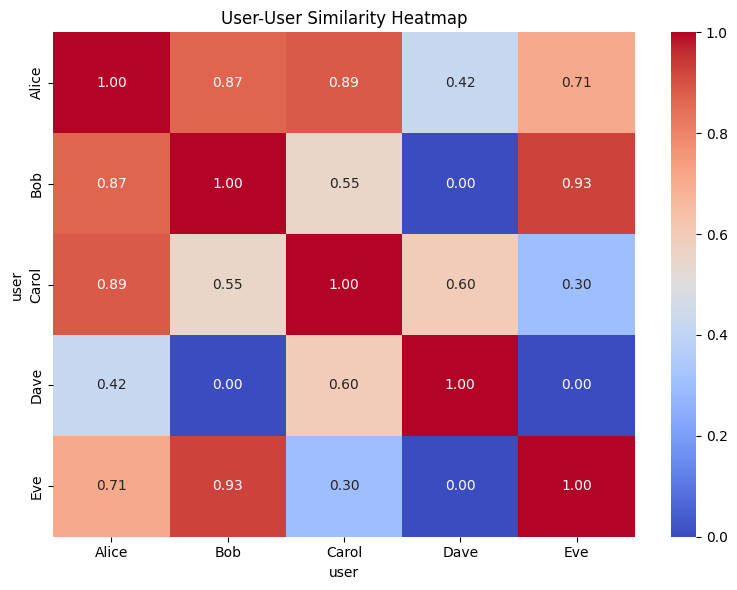

In [7]:
# 📸 Save heatmap of user similarity as image
plt.figure(figsize=(8, 6))
sns.heatmap(user_similarity_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('User-User Similarity Heatmap')
plt.tight_layout()
plt.savefig('user_similarity_heatmap.png')
plt.show()

In [8]:
# 📁 Save top 3 recommendations for each user to a CSV
recommendations_dict = {}

for user in user_movie_matrix.index:
    recommended = recommend_movies(user, user_movie_matrix, user_similarity_df)
    recommendations_dict[user] = list(recommended.index)

# Convert to DataFrame and save
recommendations_df = pd.DataFrame.from_dict(recommendations_dict, orient='index')
recommendations_df.columns = [f"Recommendation_{i+1}" for i in range(recommendations_df.shape[1])]
recommendations_df.to_csv("user_recommendations_sample.csv")
recommendations_df


,Recommendation_1,Recommendation_2
Alice,None,None
Bob,Inception,None
Carol,None,None
Dave,Titanic,Avengers
Eve,Titanic,Inception


In [9]:
# 📊 Evaluate performance using RMSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Flatten user_movie_matrix to get real ratings
actual_ratings = []
predicted_ratings = []

for user in user_movie_matrix.index:
    recommended = recommend_movies(user, user_movie_matrix, user_similarity_df)
    for movie in recommended.index:
        # Only consider movies the user has actually rated
        if movie in user_movie_matrix.columns and not np.isnan(user_movie_matrix.loc[user, movie]):
            actual_ratings.append(user_movie_matrix.loc[user, movie])
            predicted_ratings.append(recommended[movie])

# Calculate metrics
rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
mae = mean_absolute_error(actual_ratings, predicted_ratings)

# Save metrics to a text file
with open("performance_metrics.txt", "w") as f:
    f.write(f"📈 Performance Metrics for Collaborative Filtering Recommender:\n")
    f.write(f"Root Mean Squared Error (RMSE): {rmse:.4f}\n")
    f.write(f"Mean Absolute Error (MAE): {mae:.4f}\n")

# Display as confirmation
print("Performance metrics saved to 'performance_metrics.txt'")


Performance metrics saved to 'performance_metrics.txt'
